<a href="https://colab.research.google.com/github/Oleksandr190378/data-computing/blob/main/report_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --quiet -U langchain langchain-community langchain-core langgraph langchain_openai  langsmith faiss-cpu pypdf gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00


In [ ]:
from langchain_openai import ChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS
from langgraph.graph import START, END, StateGraph, MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage, RemoveMessage
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langgraph.prebuilt import ToolNode
from langchain_community.document_loaders import PyPDFLoader
from IPython.display import Image, display
from langgraph.prebuilt import tools_condition

In [ ]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


In [ ]:
_set_env("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "project_annual_report"

In [ ]:
from langsmith import utils
utils.tracing_is_enabled()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path='/content/drive/MyDrive/Colab Notebooks/company/'
file_path='/content/drive/MyDrive/Colab Notebooks/company/mercurity_fintech.pdf'

In [ ]:
loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)


In [ ]:
page_texts = []

for page in pages[5:]:
    page_texts.append(page.page_content)

continuous_text = " ".join(page_texts)

In [ ]:
len(continuous_text)

1020750

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=250)
text_splits = text_splitter.split_text(continuous_text)
#Creating embeddings
embeddings = OpenAIEmbeddings()
#Creating vector store"
vectorstore = FAISS.from_texts(text_splits, embeddings)
#Saving vector store locally
vectorstore.save_local(folder_path + "vector_db")
#Creating retriever
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})

In [ ]:
text_splits[0]

'Table of Contents\n3\nPART I\nITEM 1. IDENTITY OF DIRECTORS, SENIOR MANAGEMENT AND ADVISERS\nNot applicable.\nITEM 2. OFFER STATISTICS AND EXPECTED TIMETABLE\nNot applicable.\nITEM 3. KEY INFORMATION\nA.\nSelected Financial Data\nThe following selected consolidated statements of operations data for the year ended December 31, 2020, 2021 and 2022, and selected consolidated\nbalance sheet data as of December 31, 2021 and 2022, have been derived from our audited consolidated financial statements included elsewhere in this annual\nreport. The selected consolidated statements of operations data for the year ended December 31, 2018 and 2019, and consolidated balance sheet data as of\nDecember 31, 2018, 2019 and 2020 are derived from our consolidated financial statements not included in this annual report, of which the selected consolidated\nstatements of operations data for the year ended December 31, 2018 and consolidated balance sheet data as of December 31, 2018 have been restated due to

In [ ]:
vector_db_path = folder_path + "vector_db"
#Creating embeddings
embeddings = OpenAIEmbeddings()
# loading vector data base
vectorstore = FAISS.load_local(vector_db_path, embeddings, allow_dangerous_deserialization=True)
#Creating retriever
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})


In [ ]:
response = retriever.invoke("Risk factors")
response

[Document(metadata={}, page_content='in the loss of significant rights.\n●\nWe are subject to changing laws and regulations regarding regulatory matters, corporate governance and public disclosure that may increase both\nour operating costs and the risk of non-compliance.\n●\nIf we fail to maintain an effective system of internal control over financial reporting, we may be unable to accurately report our financial results or\nprevent fraud, and investor confidence and the market price of our shares may be adversely impacted. Table of Contents\n7\n●\nWe face risks related to natural disasters, health epidemics and other outbreaks, which could significantly disrupt our operations.\nRisks Relating to Doing Business in China\n●\nAdverse changes in PRC regulation of internet businesses and companies could negatively impact our business in China.\n●\nUncertainties concerning the PRC legal system may adversely affect our business in China.\n●\nYou may experience difficulties in effecting serv

In [ ]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_annual_report",
    "Accurate Answers to Annual Report Questions",
)

tools = [retriever_tool]

In [ ]:
model = ChatOpenAI(model="gpt-4o-mini", temperature=0)
llm = ChatOpenAI(model="gpt-4o", temperature=0)

In [ ]:
# Table of Contents from the vector database
table_of_contents = """
    PART I
    Item 1. Business
    Item 1A. Risk Factors
    Item 1B. Unresolved Staff Comments
    Item 2. Properties
    Item 3. Legal Proceedings
    Item 4. Mine Safety Disclosures
    PART II
    Item 5. Market for Registrant’s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities
    Item 6. [Reserved]
    Item 7. Management’s Discussion and Analysis of Financial Condition and Results of Operations
    Item 7A. Quantitative and Qualitative Disclosures About Market Risk
    Item 8. Consolidated Financial Statements and Supplementary Data
    Item 9. Changes in and Disagreements with Accountants on Accounting and Financial Disclosure
    Item 9A. Controls and Procedures
    Item 9B. Other Information
    Item 9C. Disclosure Regarding Foreign Jurisdictions that Prevent Inspections
    PART III
    Item 10. Directors, Executive Officers and Corporate Governance
    Item 11. Executive Compensation
    Item 12. Security Ownership of Certain Beneficial Owners and Management and Related Stockholder Matters
    Item 13. Certain Relationships and Related Transactions, and Director Independence
    Item 14. Principal Accounting Fees and Services
    PART IV
    Item 15. Exhibits and Financial Statement Schedules
    Item 16. Form 10-K Summary
    """


In [ ]:
def generate_detailed_question(state: MessagesState):
    """
    Generate a more detailed question from the user's input to improve retrieval accuracy.

    Args:
        state (messages): The current state containing user messages.

    Returns:
        dict: The updated state with the detailed question.
    """
    messages = state["messages"]
    user_question = messages[-1].content  # Get the last user message

    # Define a prompt to generate a detailed question
    prompt = PromptTemplate(
        template="""
        You are an expert in generating detailed and specific questions based on user queries.
        Your goal is to transform the user's short question into a more comprehensive and detailed question to improve retrieval of relevant documents from a vector database.

        **Information about the Vector Database**:
        The database contains the following sections from the company's annual report:
        {table_of_contents}

        **User's Original Question**:
        {question}

        **Instructions**:
        - Expand the question by adding relevant details, context, or clarifications.
        - Ensure the question is specific and focused on the topic of the annual report.
        - Use the information from the Table of Contents to guide the generation of the detailed question.
        - If the question is already detailed, return it as is.

        **Detailed Question**:
        """,
        input_variables=["question", "table_of_contents"],
    )


    # Use the language model to generate the detailed question
    detailed_question_chain = prompt | model | StrOutputParser()
    # Generate the detailed question
    detailed_question = detailed_question_chain.invoke({"question": user_question, "table_of_contents": table_of_contents})

    return {"messages": [detailed_question]}

In [ ]:
def agent(state: MessagesState):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    messages = state["messages"]
    model_with_tools = model.bind_tools(tools)
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}

In [ ]:
def generate(state: MessagesState):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated state with re-phrased question
    """
    messages = state["messages"]
    question = messages[0].content
    detailed_question = messages[1].content
    last_message = messages[-1]

    docs = last_message.content
    prompt = PromptTemplate(
        template="""
        You are an expert financial analyst specializing in analyzing and interpreting annual reports of companies.
        Your task is to provide accurate and insightful answers to user questions based on the provided context.

        **Context Guidelines**:
        - Carefully analyze the retrieved documents to find relevant information.


        **Retrieved Documents**:
        {context}

        **User Question**:
        {question}

        **Detailed Question**:
        {detailed_question}

        **Instructions**:
        - Use both the **User Question** and the **Detailed Question** to guide your analysis and response.
        - The **Detailed Question** is a more specific and detailed version of the **User Question**, generated to improve retrieval accuracy.
        - Provide a clear and concise answer based on the context.

        """,
        input_variables=["context", "question", "detailed_question"],
    )
    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | model | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question, "detailed_question": detailed_question})
    return {"messages": [response]}


In [ ]:
workflow = StateGraph(MessagesState)

# Define the nodes we will cycle between
workflow.add_node("generate_detailed_question", generate_detailed_question)  # Detailed question generator
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("generate", generate)

workflow.add_edge(START, "generate_detailed_question")
workflow.add_edge("generate_detailed_question", "agent")
# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

workflow.add_edge( "retrieve","generate")
workflow.add_edge("generate", END)
#workflow.add_edge("delete", END)

# Compile
graph = workflow.compile()

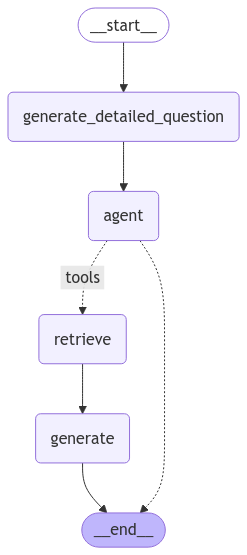

In [ ]:
try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
input_message =  "analize the amounts of cash  cash equivalents and restricted cash in 2021 and 2022"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

analize the amounts of cash  cash equivalents and restricted cash in 2021 and 2022
================================ Human Message =================================

Could you provide a detailed analysis of the amounts reported for cash, cash equivalents, and restricted cash in the consolidated financial statements for the years 2021 and 2022? Specifically, I am interested in understanding the year-over-year changes in these figures, any notes or explanations provided in the financial statements regarding these amounts, and how they relate to the company's overall financial condition and liquidity as discussed in the Management’s Discussion and Analysis section of the annual report. Additionally, if there are any relevant disclosures about market risks or other factors that may have influenced these cash positions, please include that information as well.
================================== Ai Message =====

In [ ]:
input_message =  "analize company's Lease Expense during 2020 2021 2022 years"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

analize company's Lease Expense during 2020 2021 2022 years
================================ Human Message =================================

Could you provide a comprehensive analysis of the company's lease expenses reported in the annual financial statements for the years 2020, 2021, and 2022? Specifically, I am interested in understanding the trends in lease expenses over these years, any significant changes or fluctuations, and how these expenses are reflected in the Management’s Discussion and Analysis of Financial Condition and Results of Operations (Item 7) as well as in the Consolidated Financial Statements (Item 8). Additionally, please include any relevant notes or disclosures regarding lease obligations that may be found in the financial statements or risk factors (Item 1A) that could impact these expenses.
================================== Ai Message ==================================
Tool Ca

In [ ]:
def generate2(state: MessagesState):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated state with re-phrased question
    """
    messages = state["messages"]
    question = messages[0].content
    detailed_question = messages[1].content
    last_message = messages[-1]

    docs = last_message.content
    prompt = PromptTemplate(
        template="""
        You are an expert financial analyst specializing in analyzing and interpreting annual reports of companies.
        Your task is to provide accurate and insightful answers to user questions based on the provided context.

        **Context Guidelines**:
        - Carefully analyze the retrieved documents to find relevant information.


        **Retrieved Documents**:
        {context}

        **User Question**:
        {question}

        **Detailed Question**:
        {detailed_question}

        **Instructions**:
        - Use both the **User Question** and the **Detailed Question** to guide your analysis and response.
        - The **Detailed Question** is a more specific and detailed version of the **User Question**, generated to improve retrieval accuracy.
        - Provide a clear and concise answer based on the context.

        """,
        input_variables=["context", "question", "detailed_question"],
    )
    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question, "detailed_question": detailed_question})
    return {"messages": [response]}

In [ ]:
workflow2 = StateGraph(MessagesState)

# Define the nodes we will cycle between
workflow2.add_node("generate_detailed_question", generate_detailed_question)  # Detailed question generator
workflow2.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool])
workflow2.add_node("retrieve", retrieve)  # retrieval
workflow2.add_node("generate", generate2)

workflow2.add_edge(START, "generate_detailed_question")
workflow2.add_edge("generate_detailed_question", "agent")
# Decide whether to retrieve
workflow2.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

workflow2.add_edge( "retrieve","generate")
workflow2.add_edge("generate", END)
#workflow.add_edge("delete", END)

# Compile
graph2 = workflow2.compile()

In [ ]:
import gradio as gr


def chat_with_graph(input_message):
    """
   The function for processing the user's question using the graph.
    """
    for step in graph.stream(
        {"messages": [{"role": "user", "content": input_message}]},
        stream_mode="values",
    ):
        response = step["messages"][-1].content

    return response

with gr.Blocks() as demo:

    chatbot = gr.Chatbot(label="Chat")
    msg = gr.Textbox(label="Enter your question")
    clear = gr.Button("Clear")

    def respond(user_message, history):
        """
        The function for processing the user's message and the response from the graph.
        """
        bot_response = chat_with_graph(user_message)

        history.append((user_message, bot_response))
        return "", history

    msg.submit(respond, [msg, chatbot], chatbot)
    clear.click(lambda: [], None, chatbot)


demo.launch()

/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:242: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5ca5361224f09e0c1c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
